##Загрузка и представление данных.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv')

In [ ]:
df.shape

(4177, 9)

Датасет содержит 4177 строк и 9 столбцов.

In [ ]:
df.head(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


В данных есть пропуски, в признаках - **Diameter, Whole weight, Shell weight**. Признак **Sex** содержит категориальные данные.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615000,0.8150
Diameter,4078.0,0.407840,0.099286,0.0550,0.3500,0.4250,0.480000,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165000,1.1300
Whole weight,4078.0,0.827306,0.490348,0.0020,0.4405,0.7985,1.150875,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502000,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253000,0.7600
Shell weight,4127.0,0.239072,0.138942,0.0015,0.1300,0.2350,0.328250,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000000,29.0000


In [ ]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


In [ ]:
df['Sex'].value_counts()

M    1447
I    1276
F    1259
f     195
Name: Sex, dtype: int64

Вероятно, при заполнении, данные столбца **Sex** с лейблом **'F'** внесены в верхнем и нижнем регистре. Поправим.

In [ ]:
df.loc[df['Sex'] == 'f', 'Sex'] = 'F'
df['Sex'].value_counts()

F    1454
M    1447
I    1276
Name: Sex, dtype: int64

In [ ]:
df.isna().mean()

Sex               0.000000
Length            0.000000
Diameter          0.023701
Height            0.000000
Whole weight      0.023701
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      0.011970
Rings             0.000000
dtype: float64

In [ ]:
df[(df['Diameter'].isna()) | (df['Whole weight'].isna()) | (df['Shell weight'].isna())].shape[0]

242

In [ ]:
(df.shape[0] - df.dropna().shape[0]) / df.shape[0]

0.057936317931529806

Пропуски данных содержатся в **242** строках, или в почти **6%** объектов.

In [ ]:
df.duplicated().sum()

0

Полных дубликатов в данных нет.

Изучим распределение количественных переменных. Построим гистограмму и ящик с усами по каждому признаку.

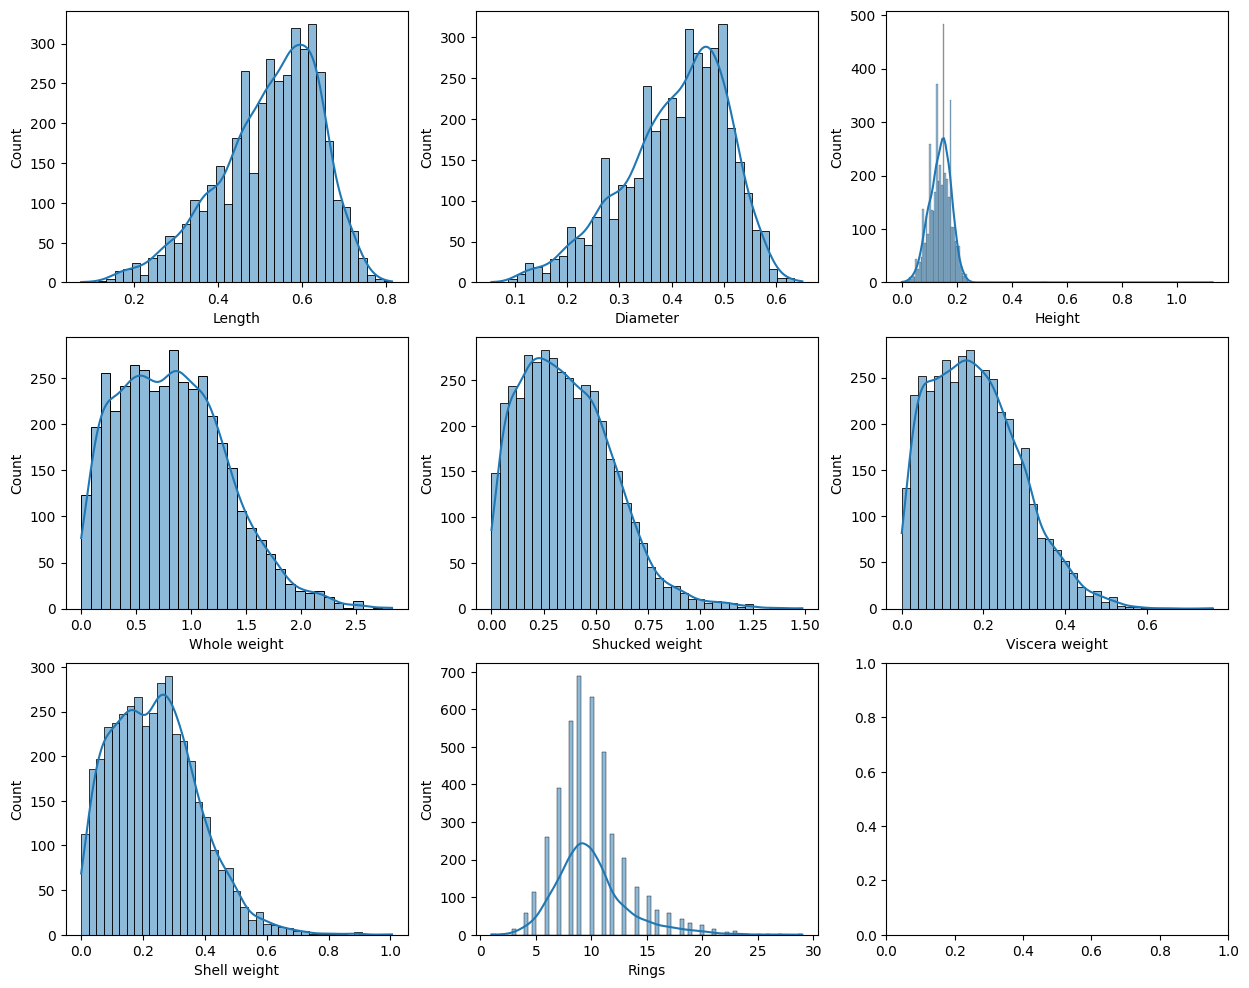

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
sns.histplot(df['Length'], kde=True, ax=axs[0,0])
sns.histplot(df['Diameter'], kde=True, ax=axs[0,1])
sns.histplot(df['Height'], kde=True, ax=axs[0,2])
sns.histplot(df['Whole weight'], kde=True, ax=axs[1,0])
sns.histplot(df['Shucked weight'], kde=True, ax=axs[1,1])
sns.histplot(df['Viscera weight'], kde=True, ax=axs[1,2])
sns.histplot(df['Shell weight'], kde=True, ax=axs[2,0])
sns.histplot(df['Rings'], kde=True, ax=axs[2,1])
plt.show()

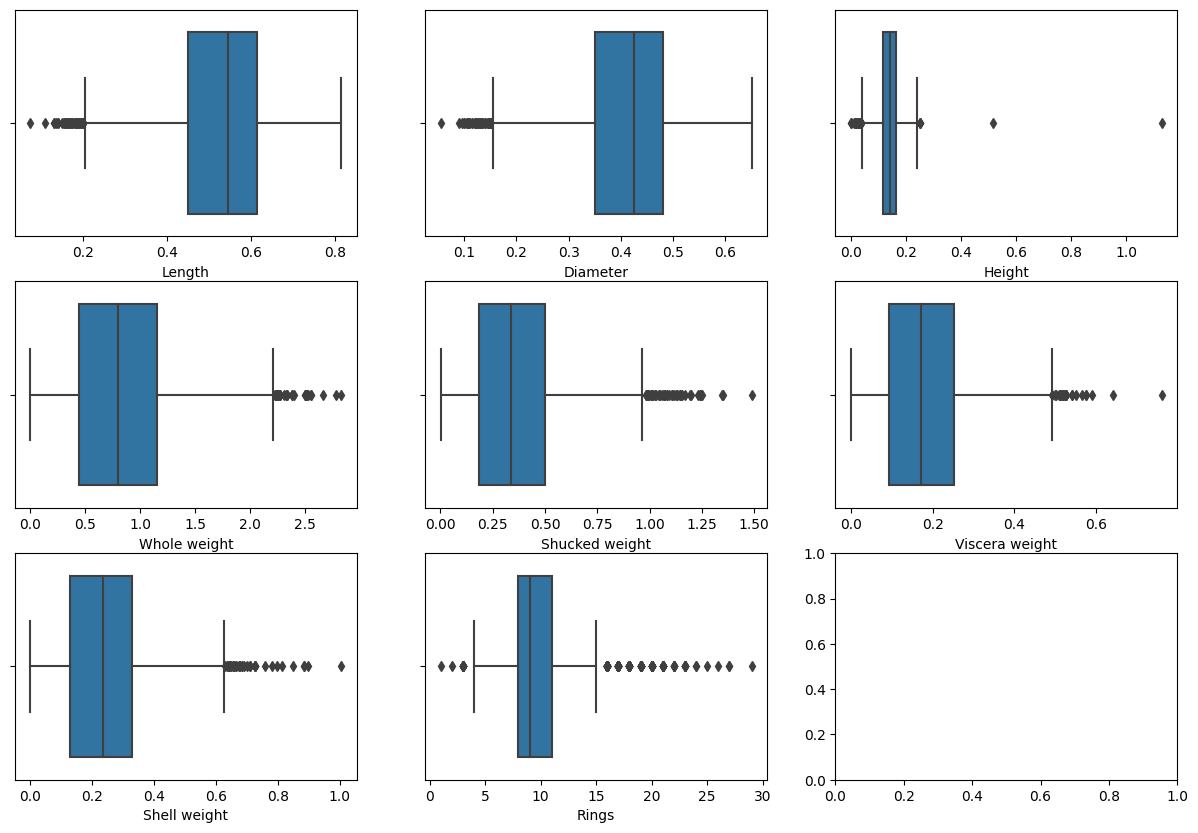

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
sns.boxplot(x='Length', data=df, ax=axs[0,0])
sns.boxplot(x='Diameter', data=df, ax=axs[0,1])
sns.boxplot(x='Height', data=df, ax=axs[0,2])
sns.boxplot(x='Whole weight', data=df, ax=axs[1,0])
sns.boxplot(x='Shucked weight', data=df, ax=axs[1,1])
sns.boxplot(x='Viscera weight', data=df, ax=axs[1,2])
sns.boxplot(x='Shell weight', data=df, ax=axs[2,0])
sns.boxplot(x='Rings', data=df, ax=axs[2,1])
plt.show()

Признак **Height** содержит явно выраженные выбросы, думаю мы можем безболезненно удалить эти строки.

In [ ]:
df = df[df['Height'] < 0.3]
df.shape

(4175, 9)

##Взаимосвязи переменных с целевой переменной и между собой.

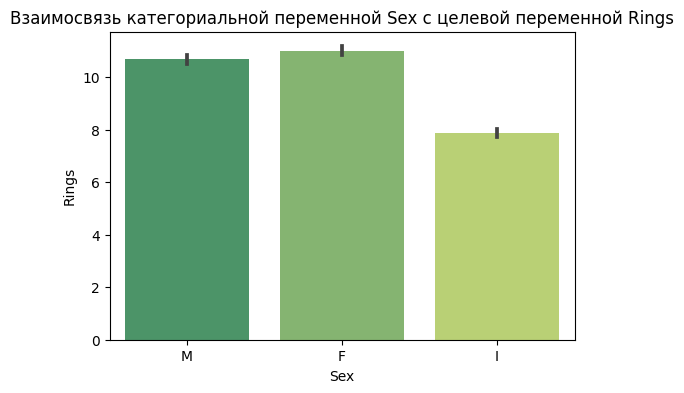

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Sex', y='Rings', data = df, palette='summer')
plt.title('Взаимосвязь категориальной переменной Sex с целевой переменной Rings')
plt.show();

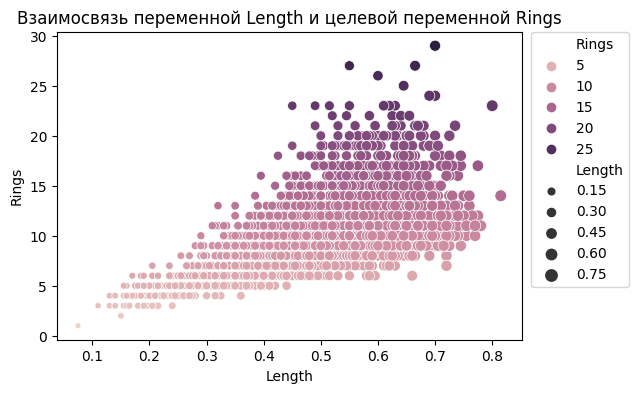

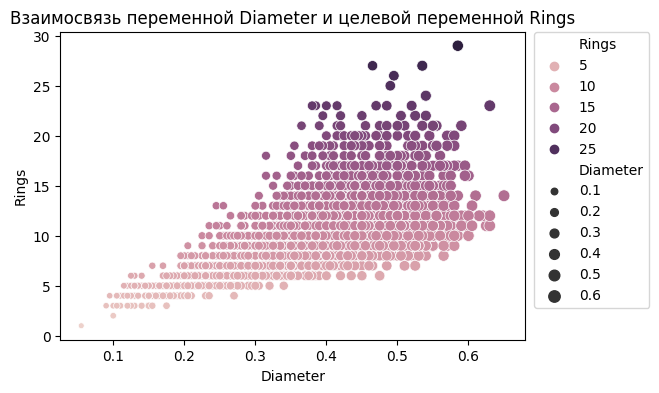

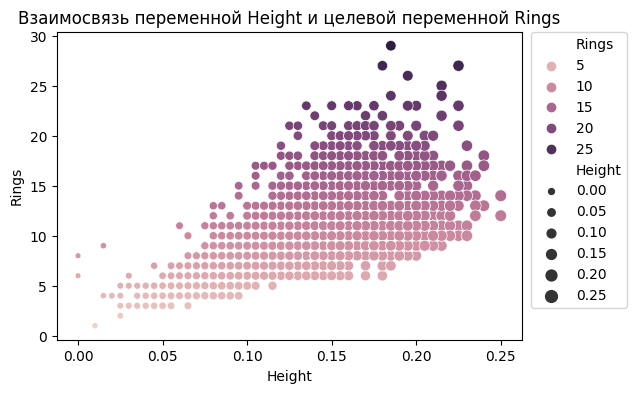

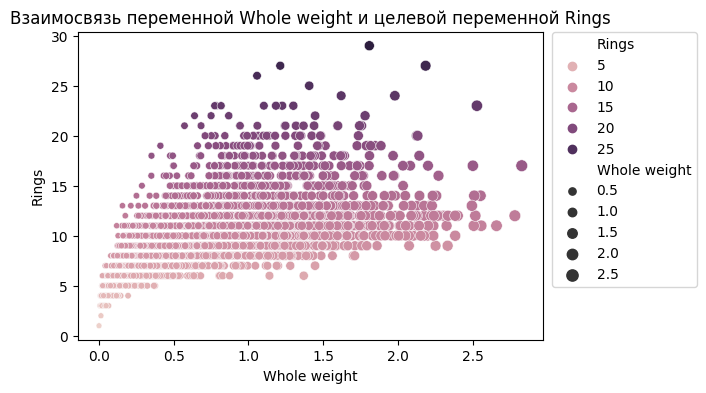

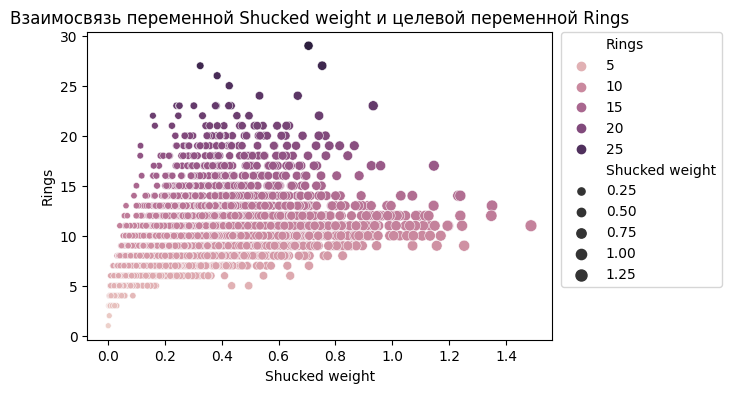

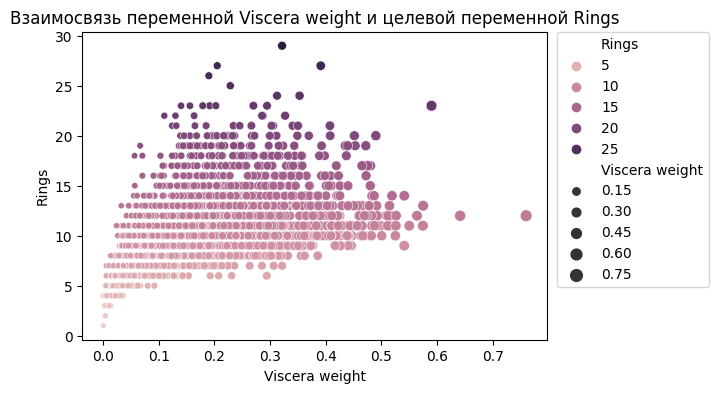

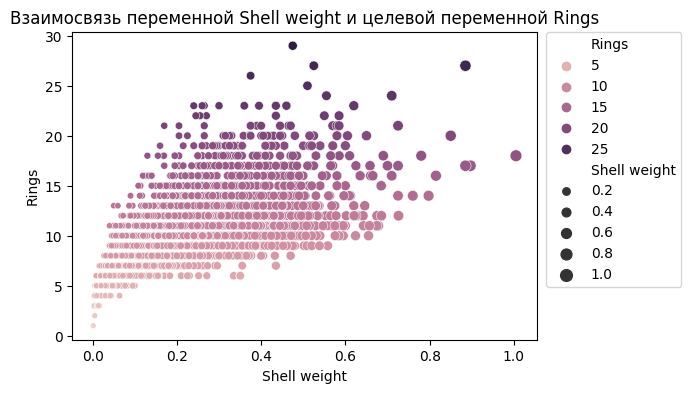

In [ ]:
for _ in df.columns:
  if df[_].dtype != 'object' and _ != 'Rings':
    print()
    plt.figure(figsize=(6,4))
    sns.scatterplot(x = _, y='Rings', data = df, size=_, hue='Rings')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Взаимосвязь переменной {_} и целевой переменной Rings')
    plt.show();

Рассмотрим корреляцию количественных переменных между собой.

In [ ]:
df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
    'Viscera weight', 'Shell weight', 'Rings']].corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986691,0.899834,0.925329,0.898184,0.903091,0.897309,0.556827
Diameter,0.986691,1.000000,0.905983,0.925945,0.893489,0.899813,0.904363,0.572580
Height,0.899834,0.905983,1.000000,0.888437,0.836400,0.865710,0.887998,0.609634
Whole weight,0.925329,0.925945,0.888437,1.000000,0.969504,0.966652,0.954998,0.539992
Shucked weight,0.898184,0.893489,0.836400,0.969504,1.000000,0.931868,0.881937,0.421442
Viscera weight,0.903091,0.899813,0.865710,0.966652,0.931868,1.000000,0.907058,0.504234
Shell weight,0.897309,0.904363,0.887998,0.954998,0.881937,0.907058,1.000000,0.625941
Rings,0.556827,0.572580,0.609634,0.539992,0.421442,0.504234,0.625941,1.000000


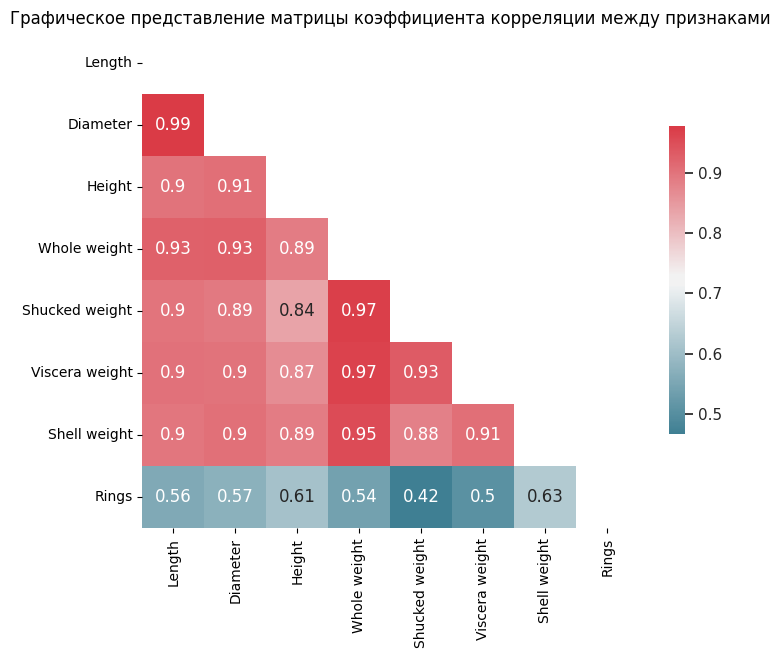

In [ ]:
corr = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Rings']].corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(len(df[['Length', 'Diameter', 'Height',
                                      'Whole weight', 'Shucked weight',
                                      'Viscera weight', 'Shell weight',
                                      'Rings']].columns),
                              len(df[['Length', 'Diameter', 'Height',
                                      'Whole weight', 'Shucked weight',
                                      'Viscera weight', 'Shell weight',
                                      'Rings']].columns)))
cmap = sns.diverging_palette(h_neg=220, h_pos=10, s=75, l=50, sep=10,
                             n=len(df[['Length', 'Diameter', 'Height',
                                       'Whole weight', 'Shucked weight',
                                       'Viscera weight', 'Shell weight',
                                       'Rings']].columns),
                             center='light', as_cmap=True)
sns.set(style="white")
sns.heatmap(corr,
            vmin=None,
            vmax=None,
            cmap=cmap,
            center=None,
            robust=True,
            annot=True,
            annot_kws=None,
            cbar=True,
            cbar_kws={"shrink": .5},
            cbar_ax=None,
            square=True,
            xticklabels='auto',
            yticklabels='auto',
            mask=mask,
            ax=None)

plt.title('Графическое представление матрицы коэффициента корреляции между признаками')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Наблюдается линейня зависимость практически всех признаков между собой, _от сильной до очень сильной_. Целевая переменная **Rings** демонстрирует корреляционную связь с остальными признаками, _от умеренной до заметной_.

Рассмотрим целевую переменную, как категориальную на 28 классов, тогда, для измерения связи между двумя категориальными признаками (**Sex** и **Rings**), мы можем вычислить V-меру Крамера.

In [ ]:
!pip install association-metrics -q
import association_metrics as am

df_cat = df[['Sex', 'Rings']].astype('category')
cramersv = am.CramersV(df_cat)

cramersv.fit()

,Sex,Rings
Sex,1.000000,0.386392
Rings,0.386392,1.000000


Мы можем констатировать наличие умеренной зависимости между признаками.

Для измерения связи между категориальным признаком **Sex** и остальными, количественными признаками, воспользуемся статистическим методом **Analysis of Variance (ANOVA)**.

In [ ]:
from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


Тест показывает наличие взаимосвязи.

##Анализ целевой переменной.

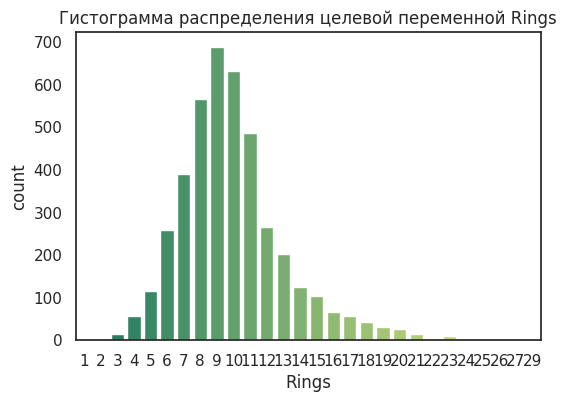

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x='Rings', data=df, palette='summer')
plt.title('Гистограмма распределения целевой переменной Rings')
plt.show();

Переменная имеет примерно нормальное распределение, с небольшой положительной ассиметрией. Что может привести к увеличению значения функции ошибки на тяжелом хвосте справа.

##Сравнение скорости работы Pandas и Polars на увеличенном датасете.

Увеличим число строк в датасете до 1млн.

In [ ]:
df_big = df.copy()

for i in range(250):
  df_big = pd.concat([df_big, df])

print(df_big.shape, df.shape)

df_big.to_csv("abalone_df_big.csv", index=False)

(1047925, 9) (4175, 9)


In [ ]:
!pip install polars
import polars as pl

In [ ]:
%%time
df_pl = pl.read_csv("abalone_df_big.csv")

CPU times: user 794 ms, sys: 141 ms, total: 935 ms
Wall time: 858 ms


In [ ]:
%%time
df = pd.read_csv("abalone_df_big.csv")

CPU times: user 1.22 s, sys: 91 ms, total: 1.31 s
Wall time: 1.67 s


**Polars** показывает двукратное увеличение скорости загрузки данных в сравнении с **Pandas**.

In [ ]:
%%time
df_pl.filter((pl.col('Diameter') > 0.4) & (pl.col('Whole weight') > 0.8))

CPU times: user 40.1 ms, sys: 12.7 ms, total: 52.8 ms
Wall time: 32.4 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""F""",0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19
"""F""",0.565,0.44,0.155,0.9395,0.4275,0.214,0.27,12
"""F""",0.615,0.48,0.165,1.1615,0.513,0.301,0.305,10
"""F""",0.56,0.44,0.14,0.9285,0.3825,0.188,0.3,11
"""F""",0.58,0.45,0.185,0.9955,0.3945,0.272,0.285,11
"""M""",0.59,0.445,0.14,0.931,0.356,0.234,0.28,12
"""M""",0.605,0.475,0.18,0.9365,0.394,0.219,0.295,15
"""M""",0.575,0.425,0.14,0.8635,0.393,0.227,0.2,11
"""M""",0.58,0.47,0.165,0.9975,0.3935,0.242,0.33,10


In [ ]:
%%time
df[(df['Diameter'] > 0.4) & (df['Whole weight'] > 0.8)]

CPU times: user 33.9 ms, sys: 4.98 ms, total: 38.8 ms
Wall time: 42.2 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
22,F,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.2700,12
24,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.3050,10
25,F,0.560,0.440,0.140,0.9285,0.3825,0.1880,0.3000,11
26,F,0.580,0.450,0.185,0.9955,0.3945,0.2720,0.2850,11
...,...,...,...,...,...,...,...,...,...
1047920,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
1047921,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1047922,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
1047923,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**Polars** фильтрует данные чуть быстрее в сравнении с **Pandas**.

In [ ]:
%%time
df_pl.groupby('Sex').agg([pl.mean('Diameter'), pl.max('Whole weight')])

CPU times: user 74.7 ms, sys: 5.59 ms, total: 80.3 ms
Wall time: 68.2 ms


Sex,Diameter,Whole weight
str,f64,f64
"""I""",0.325737,2.0495
"""M""",0.43825,2.7795
"""F""",0.449319,2.8255


In [ ]:
%%time
df.groupby('Sex').agg({'Diameter' : 'mean', 'Whole weight' : 'max'})

CPU times: user 119 ms, sys: 14 ms, total: 133 ms
Wall time: 149 ms


,Diameter,Whole weight
Sex,,
F,0.449319,2.8255
I,0.325737,2.0495
M,0.438250,2.7795



**Polars** демонстрирует двукратное увеличение скорости агрегации данных в сравнении с **Pandas**.

##Изучим пропуски в данных и заполним их:

In [ ]:
df['Diameter'].isna().sum(), df['Whole weight'].isna().sum(), df['Shell weight'].isna().sum()

(24849, 24849, 12550)

In [ ]:
df[(df['Whole weight'].isna()) & (df['Diameter'].isna()) & (df['Shell weight'].isna())].shape[0]

0

Пропуски есть в трех признаках, при этом нет объектов в которых были бы допущенны пропуски во всех трех признаках сразу. Посмотрим на наличие пропусков в объектах попарно.

In [ ]:
df[(df['Whole weight'].isna()) & (df['Diameter'].isna())].shape[0]

1004

In [ ]:
df[(df['Whole weight'].isna()) & (df['Diameter'].isna())]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
952,M,0.480,NaN,0.12,NaN,0.3120,0.1170,0.1400,7
2110,M,0.525,NaN,0.13,NaN,0.3265,0.1975,0.1750,8
2551,I,0.315,NaN,0.07,NaN,0.0580,0.0325,0.0470,7
3713,M,0.780,NaN,0.21,NaN,1.1945,0.5745,0.6745,11
5127,M,0.480,NaN,0.12,NaN,0.3120,0.1170,0.1400,7
...,...,...,...,...,...,...,...,...,...
1043288,M,0.780,NaN,0.21,NaN,1.1945,0.5745,0.6745,11
1044702,M,0.480,NaN,0.12,NaN,0.3120,0.1170,0.1400,7
1045860,M,0.525,NaN,0.13,NaN,0.3265,0.1975,0.1750,8
1046301,I,0.315,NaN,0.07,NaN,0.0580,0.0325,0.0470,7


In [ ]:
df[(df['Whole weight'].isna()) & (df['Shell weight'].isna())].shape[0]

251

In [ ]:
df[(df['Whole weight'].isna()) & (df['Shell weight'].isna())]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3586,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12
7761,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12
11936,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12
16111,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12
20286,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12
...,...,...,...,...,...,...,...,...,...
1030636,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12
1034811,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12
1038986,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12
1043161,M,0.65,0.515,0.185,NaN,0.75,0.1805,NaN,12


In [ ]:
df[(df['Shell weight'].isna()) & (df['Diameter'].isna())].shape[0]

251

In [ ]:
df[(df['Shell weight'].isna()) & (df['Diameter'].isna())]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1181,F,0.655,NaN,0.175,1.415,0.5885,0.3725,NaN,10
5356,F,0.655,NaN,0.175,1.415,0.5885,0.3725,NaN,10
9531,F,0.655,NaN,0.175,1.415,0.5885,0.3725,NaN,10
13706,F,0.655,NaN,0.175,1.415,0.5885,0.3725,NaN,10
17881,F,0.655,NaN,0.175,1.415,0.5885,0.3725,NaN,10
...,...,...,...,...,...,...,...,...,...
1028231,F,0.655,NaN,0.175,1.415,0.5885,0.3725,NaN,10
1032406,F,0.655,NaN,0.175,1.415,0.5885,0.3725,NaN,10
1036581,F,0.655,NaN,0.175,1.415,0.5885,0.3725,NaN,10
1040756,F,0.655,NaN,0.175,1.415,0.5885,0.3725,NaN,10


In [ ]:
6/4177

0.0014364376346660283

Шесть строк из всего объема содержат пропуски сразу в двух признаках. Т.к. это менее 0.002% данных, и среди этих объектов значения целевой переменной представленны в максимальном количестве объектов датасета, думаю мы можем безболезненно удалить эти строки.

In [ ]:
df = df[~((df['Whole weight'].isna()) & (df['Diameter'].isna()))]
df = df[~((df['Whole weight'].isna()) & (df['Shell weight'].isna()))]
df = df[~((df['Shell weight'].isna()) & (df['Diameter'].isna()))]
df.shape

(1046419, 9)

Используем линейную регрессию для предсказания пропущенных значений в данных, основываясь на признаках с наибольшей корреляционной связью.

###Diameter <- Length, Whole weight, Viscera weight, Shell weight

In [ ]:
X = df[~df['Diameter'].isna()][['Length', 'Whole weight', 'Viscera weight', 'Shell weight']].dropna()
y = df.loc[X.index, 'Diameter']

lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)

print(f'MAE = {np.round(mean_absolute_error(y, predictions), 5)}')
print(f'RMSE = {np.round(np.sqrt(mean_squared_error(y, predictions)), 5)}')

MAE = 0.01107
RMSE = 0.01548


In [ ]:
df['Diameter'].mean(), df['Diameter'].median()

(0.4077877300613499, 0.425)

In [ ]:
X = df[df['Diameter'].isna()][['Length', 'Whole weight', 'Viscera weight', 'Shell weight']]
diameter_predictions = lr.predict(X)
df.loc[df['Diameter'].isna(), 'Diameter'] = np.around(diameter_predictions, 3)

In [ ]:
df['Diameter'].isna().sum()

0

###Whole weight <- Length, Viscera weight, Shucked weight, Shell weight

In [ ]:
X = df[~df['Whole weight'].isna()][['Length', 'Viscera weight', 'Shucked weight', 'Shell weight']].dropna()
y = df.loc[X.index, 'Whole weight']

lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)

print(f'MAE = {np.round(mean_absolute_error(y, predictions), 5)}')
print(f'RMSE = {np.round(np.sqrt(mean_squared_error(y, predictions)), 5)}')

MAE = 0.02499
RMSE = 0.04693


In [ ]:
df['Whole weight'].mean(), df['Whole weight'].median()

(0.826879509202454, 0.798)

In [ ]:
X = df[df['Whole weight'].isna()][['Length', 'Viscera weight', 'Shucked weight', 'Shell weight']]
whole_weight_predictions = lr.predict(X)
df.loc[df['Whole weight'].isna(), 'Whole weight'] = np.around(whole_weight_predictions, 4)

In [ ]:
df['Whole weight'].isna().sum()

0

###Shell weight <- Length, Viscera weight, Whole weight, Diameter

In [ ]:
X = df[~df['Shell weight'].isna()][['Length', 'Viscera weight', 'Whole weight', 'Diameter']].dropna()
y = df.loc[X.index, 'Shell weight']

lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)

print(f'MAE = {np.round(mean_absolute_error(y, predictions), 5)}')
print(f'RMSE = {np.round(np.sqrt(mean_squared_error(y, predictions)), 5)}')

MAE = 0.02526
RMSE = 0.03924


In [ ]:
df['Shell weight'].mean(), df['Shell weight'].median()

(0.23901152632856107, 0.235)

In [ ]:
X = df[df['Shell weight'].isna()][['Length', 'Viscera weight', 'Whole weight', 'Diameter']]
shell_weight_predictions = lr.predict(X)
df.loc[df['Shell weight'].isna(), 'Shell weight'] = np.around(shell_weight_predictions, 4)

In [ ]:
df['Shell weight'].isna().sum()

0

Пропуски в данных отсутствуют.

In [ ]:
df.isna().mean()

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [ ]:
df.sample(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
603946,I,0.505,0.385,0.125,0.5960,0.2450,0.0970,0.210,9
157726,I,0.430,0.350,0.105,0.3660,0.1705,0.0855,0.110,6
573229,I,0.425,0.325,0.110,0.3335,0.1730,0.0450,0.100,7
679104,I,0.525,0.400,0.130,0.6445,0.3450,0.1285,0.200,8
299110,M,0.630,0.510,0.175,1.3415,0.6575,0.2620,0.375,10
984421,F,0.620,0.500,0.175,1.1460,0.4770,0.2300,0.390,13
132424,M,0.640,0.495,0.165,1.3070,0.6780,0.2920,0.266,11


In [ ]:
#!pip install ydata_profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [ ]:
#from ydata_profiling import ProfileReport

#df_profiling = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv')

#profile_report = ProfileReport(df_profiling, title='Pandas Profiling Report')

#profile_report

In [ ]:
#profile_report.to_file('abalone_report.html')